In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid')

df = pd.read_csv('../data/zomato_cleaned.csv')
print(df.shape)

(39581, 7)


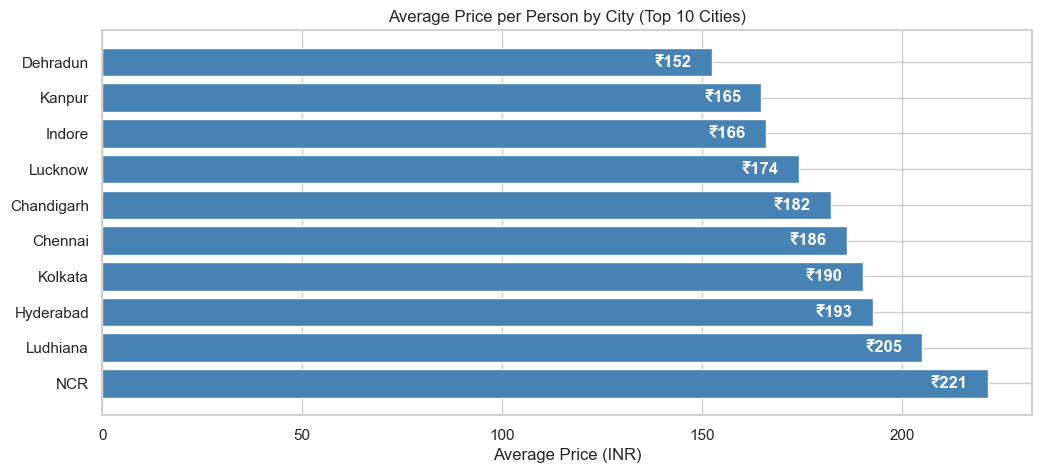

In [2]:
#  Average Price by City    
top_cities = df['Location'].value_counts().head(10).index
city_price = df[df['Location'].isin(top_cities)].groupby('Location')['Average Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
bars = plt.barh(city_price.index, city_price.values, color='steelblue')
for bar, val in zip(bars, city_price.values):
    plt.text(val - 5, bar.get_y() + bar.get_height()/2,
             f'₹{val:.0f}', va='center', ha='right', color='white', fontweight='bold')
plt.title('Average Price per Person by City (Top 10 Cities)')
plt.xlabel('Average Price (INR)')
plt.savefig('../visuals/city_avg_price.png', bbox_inches='tight')
plt.show()

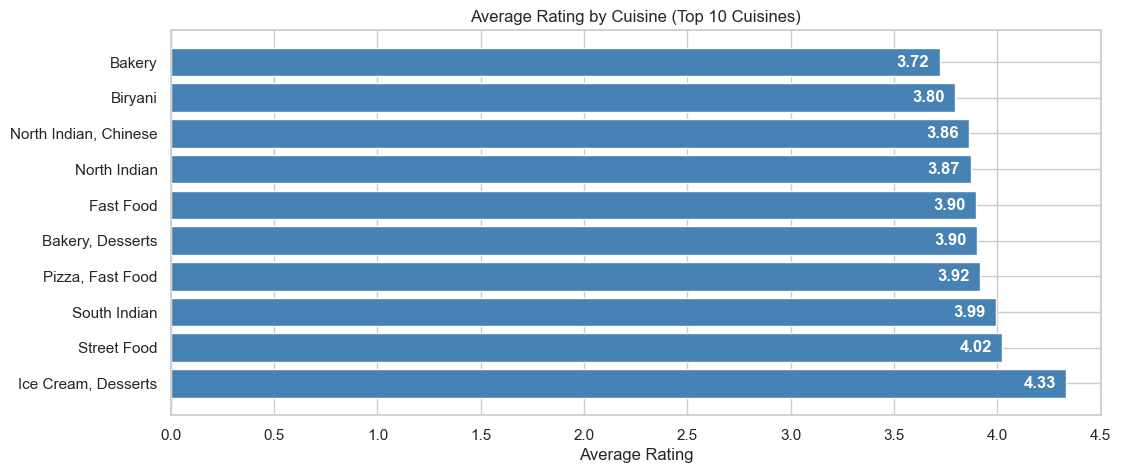

In [3]:
# Average Rating by Cuisine 
top_cuisines = df['Cuisine'].value_counts().head(10).index
cuisine_rating = df[df['Cuisine'].isin(top_cuisines)].groupby('Cuisine')['Rating'].mean().dropna().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
bars = plt.barh(cuisine_rating.index, cuisine_rating.values, color='steelblue')
for bar, val in zip(bars, cuisine_rating.values):
    plt.text(val - 0.05, bar.get_y() + bar.get_height()/2,
             f'{val:.2f}', va='center', ha='right', color='white', fontweight='bold')
plt.title('Average Rating by Cuisine (Top 10 Cuisines)')
plt.xlabel('Average Rating')
plt.xlim(0, 4.5)
plt.savefig('../visuals/cuisine_avg_rating.png', bbox_inches='tight')
plt.show()

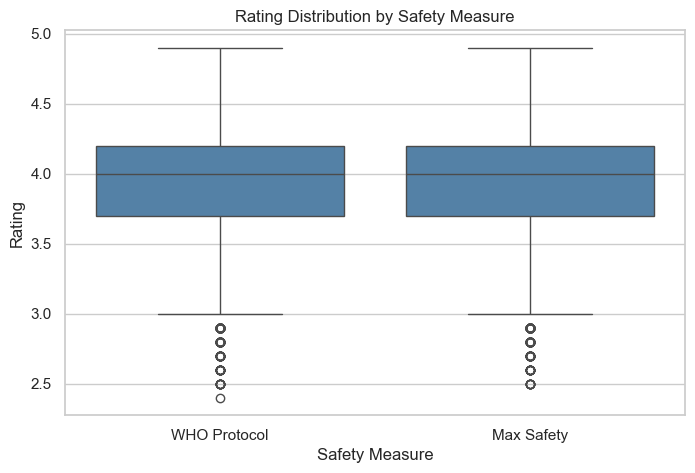

In [4]:
# Safety Measure vs Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Safety Measure', y='Rating', color='steelblue')
plt.xticks([0, 1], ['WHO Protocol', 'Max Safety'])
plt.title('Rating Distribution by Safety Measure')
plt.xlabel('Safety Measure')
plt.ylabel('Rating')
plt.savefig('../visuals/safety_vs_rating.png', bbox_inches='tight')
plt.show()

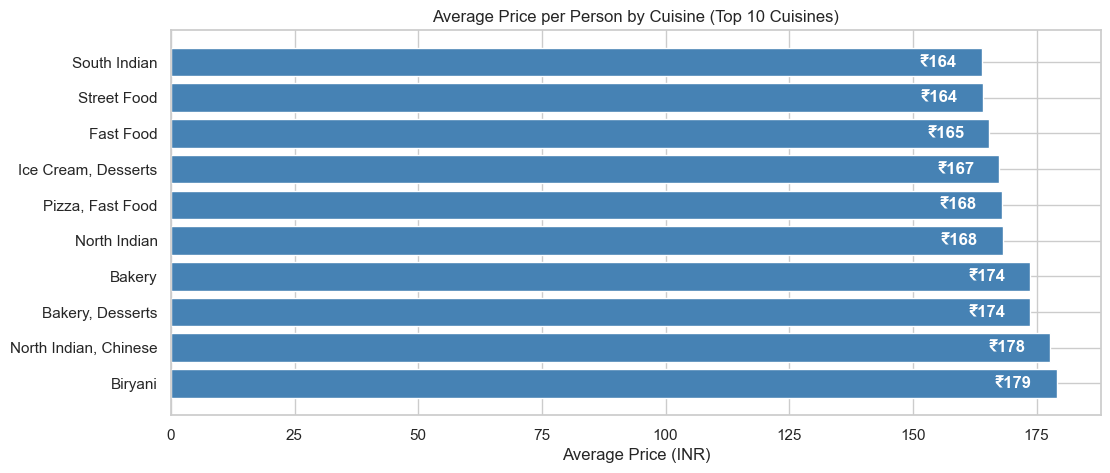

In [5]:
# Average Price by Cuisine 
cuisine_price = df[df['Cuisine'].isin(top_cuisines)].groupby('Cuisine')['Average Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
bars = plt.barh(cuisine_price.index, cuisine_price.values, color='steelblue')
for bar, val in zip(bars, cuisine_price.values):
    plt.text(val - 5, bar.get_y() + bar.get_height()/2,
             f'₹{val:.0f}', va='center', ha='right', color='white', fontweight='bold')
plt.title('Average Price per Person by Cuisine (Top 10 Cuisines)')
plt.xlabel('Average Price (INR)')
plt.savefig('../visuals/cuisine_avg_price.png', bbox_inches='tight')
plt.show()

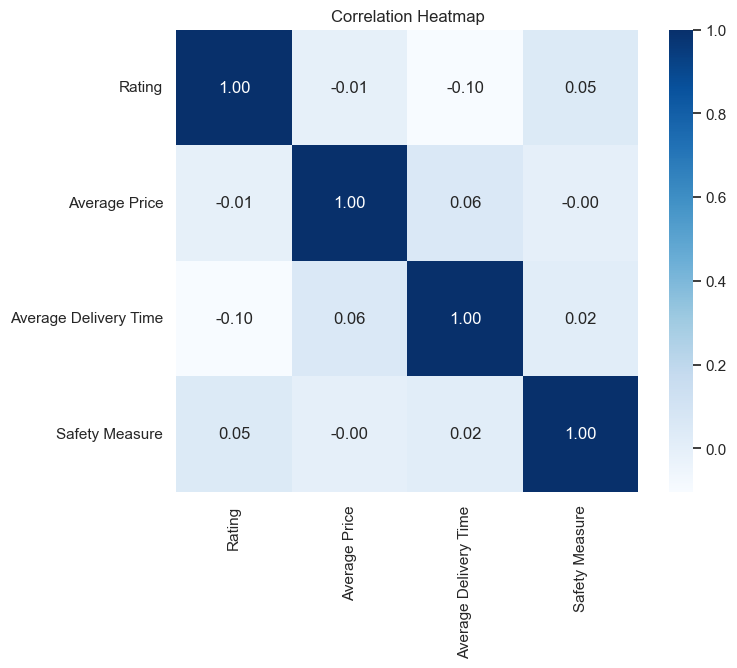

In [6]:
plt.figure(figsize=(8, 6))
corr = df[['Rating', 'Average Price', 'Average Delivery Time', 'Safety Measure']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title('Correlation Heatmap')
plt.savefig('../visuals/correlation_heatmap.png', bbox_inches='tight')
plt.show()

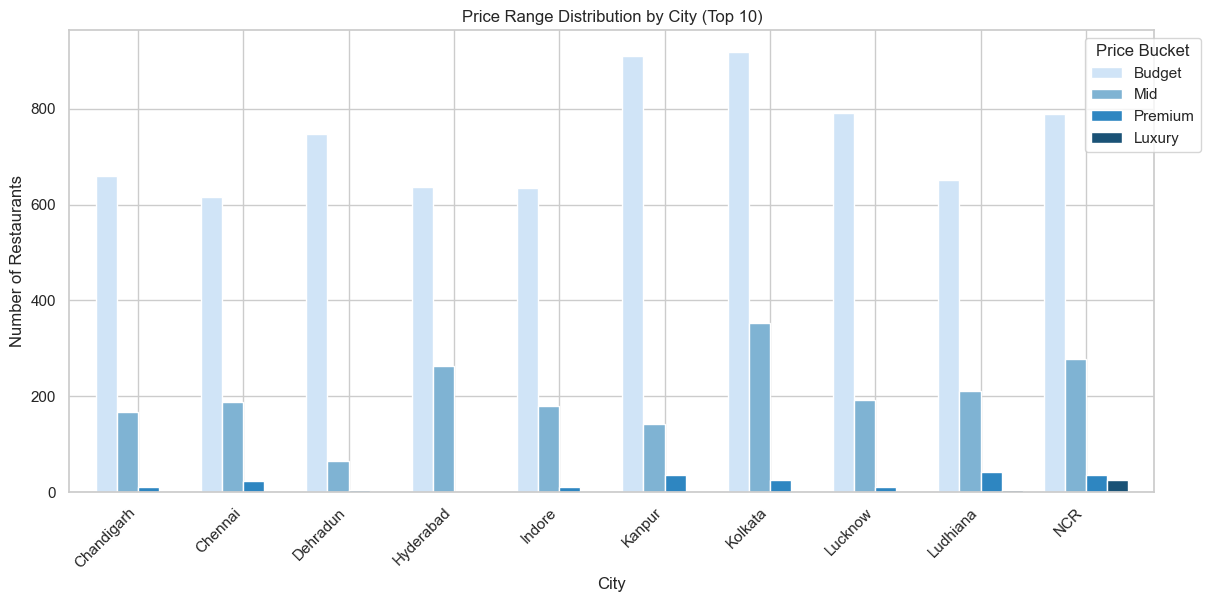

In [8]:
#  Price Range Distribution by City 
top_cities = df['Location'].value_counts().head(10).index
city_price_dist = df[df['Location'].isin(top_cities)].copy()
city_price_dist['Price Bucket'] = pd.cut(city_price_dist['Average Price'],
                                          bins=[0, 200, 400, 600, 1600],
                                          labels=['Budget', 'Mid', 'Premium', 'Luxury'])

city_price_pivot = city_price_dist.groupby(['Location', 'Price Bucket']).size().unstack().fillna(0)

city_price_pivot.plot(kind='bar', figsize=(14, 6),
                      color=['#d0e4f7', '#7fb3d3', '#2e86c1', '#1a5276'],
                      width=0.8)
plt.title('Price Range Distribution by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.legend(title='Price Bucket', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.savefig('../visuals/city_price_distribution.png', bbox_inches='tight')
plt.show()

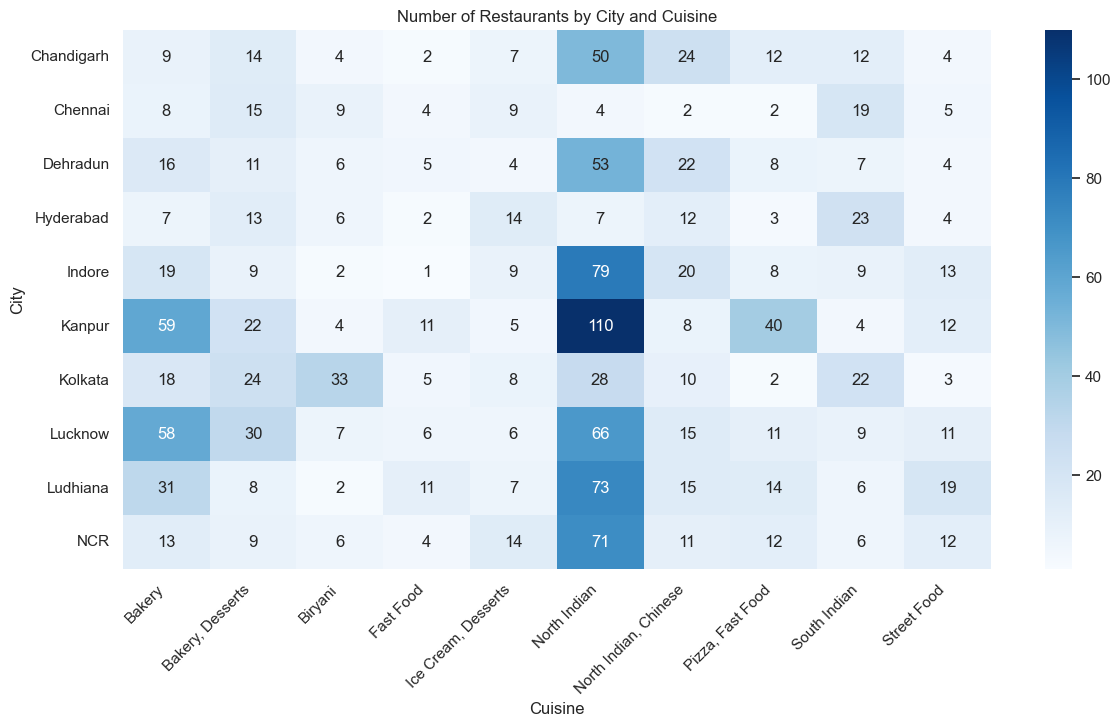

In [9]:
# Top Cuisine per City Heatmap
top_cuisines = df['Cuisine'].value_counts().head(10).index
top_cities = df['Location'].value_counts().head(10).index

heatmap_data = df[df['Cuisine'].isin(top_cuisines) & df['Location'].isin(top_cities)]
heatmap_pivot = heatmap_data.groupby(['Location', 'Cuisine']).size().unstack().fillna(0)

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Number of Restaurants by City and Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.savefig('../visuals/city_cuisine_heatmap.png', bbox_inches='tight')
plt.show()

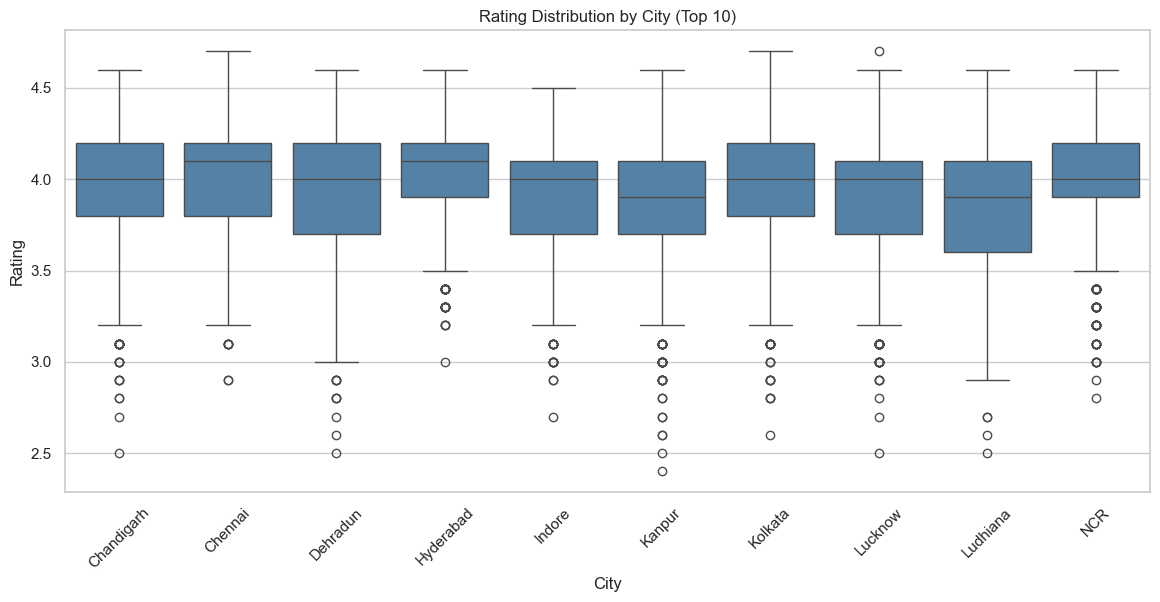

In [10]:
# Rating Distribution by City
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['Location'].isin(top_cities)],
            x='Location', y='Rating', color='steelblue')
plt.title('Rating Distribution by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.savefig('../visuals/city_rating_distribution.png', bbox_inches='tight')
plt.show()